In [11]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [12]:
driver = webdriver.Chrome()

In [13]:
url = 'https://www.instagram.com/'
driver.get(url)

In [14]:
import time

email = 'gksmfthsu000@naver.com'
input_id = driver.find_elements(By.CSS_SELECTOR, 'input._aa4b')[0]
input_id.clear()
time.sleep(1)
input_id.send_keys(email)

pw = 'Kcu051612@'
input_pw = driver.find_elements(By.CSS_SELECTOR, 'input._aa4b')[1]
input_pw.clear()
input_pw.send_keys(pw)




In [15]:
submit_b = driver.find_elements(By.CSS_SELECTOR, 'button._acan._acap._acas._aj1-._ap30')[0]
submit_b.click()
# len(submit_b)

In [18]:
# 검색 URL
search_url = 'https://www.instagram.com/explore/tags/제주도닷컴/'
driver.get(search_url)

In [19]:
# 첫번째 Post선택
post_ = driver.find_elements(By.CSS_SELECTOR, 'div > ._aabd._aa8k._al3l')[0]
post_.click()

In [20]:
# 첫번째 POST html 소스 가져오기
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [21]:
contents_ = soup.select('div._a9zs > h1')

In [22]:
contents__ = contents_[0].text
contents__

'초성에 들어갈 단어를 맞춰주세요!🎉🤭👍 제주도닷컴 초성 퀴즈 이벤트 🥴👍🎉제주도닷컴이 8월을 맞이하여 댓글 참여 이벤트를 준비했어요!..❤️ 이벤트 참여 방법 ❤️< STEP.1 >제주도닷컴을 팔로우해 주세요..< STEP. 2 >댓글로 초성 퀴즈의 정답과 함께 자신만의 제주도 여행지를 추천해 주세요!ex) 퀴즈 정답 / 우도, 자전거 타고 힐링하기 너무 좋아요! .< PLUS >※ 댓글로 친구 소환하고, 리그램 할수록 당첨 확률 UP UP!..\u200b🎉 이벤트 기간 ) 22. 08. 16(화) - 22. 08. 31(수)💛 당첨 발표 날짜 ) 2022년 9월 1일🎁 경품 내용 ) [네네치킨] 양념반후라이드반 + 콜라(1.25L) + 감자(2명) / [\u200b스타벅스] 아메리카노 Tall (20명) / [배스킨라빈스] 싱글레귤러 아이스크림 (30명)..※ 본 이벤트는 제주도닷컴 블로그와 인스타그램에서 동시에 진행하는 이벤트이며 경품은 블로그, 인스타그램을 통해 이벤트에 참여해 주신 모든 분들 중에 총 52명을 선정하여 보내 드릴 예정입니다....#제주도닷컴 #이벤트 #이벤트그램 #치킨추천 #치킨이벤트 #스타벅스이벤트 #스벅아아 #기프티콘이벤트 #기프티콘증정 #event #댓글이벤트 #참여이벤트 #타미 #8월이벤트 #렌터카 #제주도여행'

In [23]:
hash_list = contents__.split('#')
hash_list = hash_list[1:]
hash_list = [item.strip() for item in hash_list]
hash_list

['제주도닷컴',
 '이벤트',
 '이벤트그램',
 '치킨추천',
 '치킨이벤트',
 '스타벅스이벤트',
 '스벅아아',
 '기프티콘이벤트',
 '기프티콘증정',
 'event',
 '댓글이벤트',
 '참여이벤트',
 '타미',
 '8월이벤트',
 '렌터카',
 '제주도여행']

In [24]:
def insta_search(word):
  url = 'https://www.instagram.com/explore/tags/'+word
  return url

In [25]:
def select_first(driver):
  post_ = driver.find_elements(By.CSS_SELECTOR, 'div > ._aabd._aa8k._al3l')[0]
  post_.click()
  time.sleep(3)

In [26]:
def get_content(driver):
  html = driver.page_source
  soup = BeautifulSoup(html, 'html.parser')
  contents_ = soup.select('div._a9zs > h1')
  contents__ = contents_[0].text
  tags = contents__.split('#')
  contents_data = tags[0]
  tags = tags[1:]
  tags = [item.strip() for item in tags]
  data = [contents_data, tags]
  return data

In [27]:
# next button
next_btn = driver.find_elements(By.CSS_SELECTOR, 'div._aaqg._aaqh > button._abl-')
len(next_btn)

1

In [28]:
# next click event
def move_next(driver):
  try:
    next_btn = driver.find_elements(By.CSS_SELECTOR, 'div._aaqg._aaqh > button._abl-')[0]
    next_btn.click()
    time.sleep(3)
    return True
  except:
    return False

In [29]:
# 함수 활용해서 인스타 컨텐츠와 태그를 저장
word = '제주여행'
url = insta_search(word)

print(url)
driver.get(url)
time.sleep(5)

select_first(driver)

results = []
#수집할 게시글 수를 50개정도로 고정
for i in range(100):
  data = get_content(driver)
  results.append(data)
  print(data)
  is_next = move_next(driver)
  if is_next == False:
    break;
  

https://www.instagram.com/explore/tags/제주여행
['.😈연옌들도 들리는 핫한 빈티지맛집!!💜유니크한 빈티지템은 여기서! 애월 ', ['퍼플모스화려한 패턴의 이쁜옷들이 많고 관리가 잘 돼있어서퀄리티 굿👍 새옷같이 깔끔하게 입을 수 있어!가격까지 착해서 빈티지 러버들은 무조건 추천👏👏맘에드는 옷입고 힙한 포토존에서 인증샷도 찍자~!📩모든 문의는 DM ( @purplemoss_jeju )📍제주시 애월읍 하귀로 53 수입빈티지샵 퍼플모스⏰매일 12:00 - 19:00 / 연중무휴...', '정보통_제주', '제주도옷가게', '제주도빈티지샵', '애월핫플']]
['제주의 자연속에서 귀여운 스누피를 만날수 있는곳👆🏻⠀ ⠀⠀⠀⠀⠀ ⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀💌스누피가든제주 제주시 구좌읍 금백조로 930⏰09:00 - 18:00화(2/13) 10:00 - 18:00..제주여행 제주도가볼만한곳 제주핫플레이스 제주도여행 제주동쪽여행 제주도아이와가볼만한곳 제주도가족여행 제주가볼만한곳', []]
['(협찬) @cafe_the_light_jeju💗제주도에서 가장 핫한 제주카페💗 🐋오션뷰 카페 ✔카페더라이트❝ 성산일출봉과 바다를 한 눈에 볼 수 있는 뷰맛집 ❞………………《 🍮 제주 카페더라이트 》…………………📍 제주 서귀포시 성산읍 한도로 269 카페더라이트 📍⏰ 월~토 9:00 ~ 19:00🚷 매주 일요일 휴무📞 064-784-0080……………………………………………………………………………카페 전면 오션뷰 통창으로바다를 느낄 수 있는 "오션뷰카페"우도와 성산일출봉이 보이는 "루프탑 뷰맛집"인생샷을 남길 수 있는 포토존까지😍휴양지 느낌 가득 , 제주 느낌 가득한"야외좌석"도 있어요❣1층 2층 루프탑까지 넓은 카페만큼넓은 주차장까지👍✔️ 대표 메뉴1 "시그니처 라이트라떼(땅콩라떼)"✔️ 대표 메뉴2 "시그니처 제주아이스티"✔️ 대표 메뉴3 "한라봉 에이드"✔️디저트 ,베이커리 엄마손맛 수제!!웰빙 프리미엄 재료로 제주 특산품 한라봉을 이용한 디저트 !! 

In [30]:
import pandas as pd

df = pd.DataFrame(results, columns = ['content', 'tags'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  28 non-null     object
 1   tags     28 non-null     object
dtypes: object(2)
memory usage: 580.0+ bytes


/var/folders/wt/2y6lq78x2_z3fsgwvz2bnhm80000gn/T/ipykernel_31026/1916682953.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [31]:
df.to_excel('data/crawing_jeju.xlsx', index=False)

In [34]:
# 함수 활용해서 인스타 컨텐츠와 태그를 저장
word = '제주맛집'
url = insta_search(word)

print(url)
driver.get(url)
time.sleep(5)

select_first(driver)

results = []
#수집할 게시글 수를 50개정도로 고정
for i in range(100):
  data = get_content(driver)
  results.append(data)
  print(data)
  is_next = move_next(driver)
  if is_next == False:
    break;
  
  df.to_excel('data/crawing_jeju_matzip.xlsx', index=False)

https://www.instagram.com/explore/tags/제주맛집
['(리그램) 제주 여행왔으면 도민 픽!! 맛집은 필수 코스💖제주 도민 맛집🍽️💖시내권에 접근성 좋은 곳들만😲🙌 꾹꾹 눌러 담았으니까👍👍제주 맛집 투어할 때 도장깨기 GOGO~🤤 @g__r__._t_89에메랄드 빛 애월 앞바다 보면서 먹는 제주 통갈치!!😲각종 신선한 제주 해산물 총 집합!!🤤맛과 건강까지 모두 챙긴 갈치바다는 꼭 들려보자👍👍📌 갈치바다\t🗺 제주 제주시 애월읍 애월로 15-1📞 0507-0490-0734🕞 매일 10:00 ~ 22:00제주 최고 핫플 신화월드에서 맛 보는 해물전골😍건강한 재료만 고집하는 사장님의 뚝심이 깊이 우려난제주 육,해,공 식재료 모두 들어간🥩🍽️💛숨비나리💛에서 몸 보신 제대로 해보자!!📌 숨비나리🗺 제주 서귀포시 안덕면 중산간서로1615번길 8📞 0507-1401-3455🕞 매일 10:00 ~ 22:00제주 동문 야시장 근처 찐 도민맛집 💛오현불백💛제철 맞은 한치와 매콤한 돼지 불백의 만남!!말해 뭐해!! 100% 성공하는 최고의 궁합📌 오현불백🗺 제주 제주시 성지로 58-2 1층📞 064-724-2861🕞 매일 10:00 ~ 21:00 (매주 토 정기휴무)찐제주도민들이 찾는 숙성고기맛집 왕표고기🥩진짜 왕표가 대형무쇠솥뚜껑에서 1차초벌해주니 질기지 않고왕두툼한 고기를 육즙 가득 그대로 즐길 수 있는곳👍🏻📌 제주함덕흑돼지왕표고기🗺 제주 제주시 조천읍 신북로 529 1층📞 0507-1446-1046🕞 매일 15:00 ~ 01:003500평 규모의 아름다운 꽃밭에 위치한 중문고등어쌈밥!!💐🌺🌻최상의 재료가 아낌없이 들어간 😍고등어쌈밥방송에도 출연한🌈 나만 알고 싶었던 찐 도민 맛집 😂📌 중문고등어쌈밥🗺️ 제주 서귀포시 일주서로 1240 1층📞 0507-1361-2457🕞 매일 09:30 ~ 21:00제주 조용한 마을에 있는 동화같은 카페❤입구부터 카페 곳곳이 포토존!!😲📸제주 애월의 풍경과 조화롭게 어우러지는🌄힐링 감성 카페퍼시몬!!☕🍵📌 카페퍼시

In [33]:
word = '제주바다'
url = insta_search(word)

print(url)
driver.get(url)
time.sleep(5)

select_first(driver)

results = []
#수집할 게시글 수를 50개정도로 고정
for i in range(100):
  data = get_content(driver)
  results.append(data)
  print(data)
  is_next = move_next(driver)
  if is_next == False:
    break;

  df.to_excel('data/crawing_jeju_beach.xlsx', index=False)

https://www.instagram.com/explore/tags/제주바다
['', ['제주바다', '포항풀빌라', '당진가볼만한곳', '타투제거', '무거동맛집', '목포카페', '다이아몬드반지', '경산술집', '탈모예방', '남해독채펜션', '제부도맛집', '연산동꽃집', '영덕맛집', '남해핫플', '서산호수공원맛집', '카페로고']]
['성산에서 볼 수 있는 이색 검은해변🖤특이하고 신비로운 분위기의 해변과검은 해변과 만나 더 깊고 푸르게 보이는 제주도 바다를 함께 감상해봐!👀👍웅장한 자연에 넋을 놓고 구경하게 됨,,😍성산일출봉 무료 탐방길 아래에 위치해위에서 내려다보면 신기한 해변과반짝반짝 영롱한 윤슬도 감상 가능하고,해녀의집도 있어서 신선한 해산물과검은 해변을 배경으로 한 해녀공연까지 관람 가능하다는데?!👏@@여기 꼭 가보자-🖤 우뭇개해안📍 서귀포시 성산읍 성산리✔ 성산일출봉 무료탐방로 아래에 위치-', ['제주도여행코스', '제주바다', '제주해수욕장', '제주숨은명소', '성산해변', '성산바다']]
['두분의 즐거운 순간을 사랑합니다❤️Rise Up - Good Moodwith @hi_jay_official  @ermington_bouquet  @_harufilm_jeju ', ['제주웨딩촬영', '제주웨딩스냅', '제주도스냅', '제주도웨딩스냅', '제주스냅사진', '제주스냅', '제주웨딩드레스', '웨딩스냅추천', '라이즈무드', '부부작가', '제주바다', '웨딩스냅촬영']]
['어제 파도가 좀 있겠다 했는데.. 역시 부지런한 분들이.. ^^ ', ['서핑', '제주바다 🏄🏻\u200d♂️🌊..', '제주', '제주살이', '놀멍쉬멍', '제주생활여행', '지금아니면또언제', '제주여행', '제주공간', '제주자연', '제주맛집', '제주일상', '오늘의사진', '한국', 'jeju', 'jejulife', 'nature', 'travel', 'instafood', 'instadaily', 'photooftheday', 'korea']

In [38]:
import pandas as pd


# 3개의 파일을 하나의 데이터프레임으로 통합
jeju_insta_df = pd.DataFrame([])

f_list = ['data/crawing_jeju.xlsx','data/crawing_jeju_matzip.xlsx','data/crawing_jeju_beach.xlsx']

for name in f_list:
  temp = pd.read_excel(name)
  jeju_insta_df = pd.concat([jeju_insta_df, temp])
  
jeju_insta_df.tail(50)
# jeju_insta_df.columns
# jeju_insta_df.info()


,content,tags
6,누가 매일 이렇게 차려주면 좋겠다아🍽️🩵,[]
7,(협찬) @cafe_the_light_jeju💗제주도에서 가장 핫한 제주카페💗 🐋오...,"['제주여행', '제주카페', '성산일출봉카페', '제주카페추천', '제주루프탑카페..."
8,제주의 자연속에서 귀여운 스누피를 만날수 있는곳👆🏻⠀ ⠀⠀⠀⠀⠀ ⠀⠀ ⠀⠀⠀⠀⠀⠀⠀...,[]
9,(협찬) @cafe_the_light_jeju💗제주도에서 가장 핫한 제주카페💗 🐋오...,"['제주여행', '제주카페', '성산일출봉카페', '제주카페추천', '제주루프탑카페..."
10,제주시 아라동 베라체인근,"['텍사스하우스 안녕하세요. 우니저입니다🤓요즘같이 적당히 쌀쌀하거나, 몸 쓰는 일을..."
11,(협찬) @cafe_the_light_jeju💗제주도에서 가장 핫한 제주카페💗 🐋오...,"['제주여행', '제주카페', '성산일출봉카페', '제주카페추천', '제주루프탑카페..."
12,NaN,['제품제공 x @gregory_adventure_kor 산티아고 순례길 이후 처음...
13,제주의 자연속에서 귀여운 스누피를 만날수 있는곳👆🏻⠀ ⠀⠀⠀⠀⠀ ⠀⠀ ⠀⠀⠀⠀⠀⠀⠀...,"['제주여행', '제주도가볼만한곳', '제주핫플레이스', '제주도여행', '제주동쪽..."
14,NaN,"['협찬 여행은 편하고 예쁜 게 최고✈️🩵', '아수라', '패딩백', '패딩백추천..."
15,(협찬)⁣애월해안도로에 위치한 선주가 직접 ⁣제주앞바다에서 잡은 생물을 사용하여⁣질...,"['제주도맛집', '제주맛집', '애월맛집', '제주애월맛집', '애월술집\u206..."


In [ ]:
jeju_insta_df.reset_index(inplace=True)
jeju_insta_df.head()
# jeju_insta_df.columns = ['contents', 'tags']

,index,content,tags
0,0,포동포동벨리곰 🩷🧸🩷보틀종류의 케이크는 예약없이 매장에서 구매가능합니다 🩷레터링은 ...,[]
1,1,(협찬) @cafe_the_light_jeju💗제주도에서 가장 핫한 제주카페💗 🐋오...,"['제주여행', '제주카페', '성산일출봉카페', '제주카페추천', '제주루프탑카페..."
2,2,꿀팁 저장각...,"['제주꿀팁', '제주도꿀팁', '꿀팁', '제주여행', '여행', '커플', '맛..."
3,3,현시각 유채꽃🌼과 매화를 한번에 볼 수 있는 제주 봄스팟💞 제주도민이 추천하는 가장...,"['제주', '제주여행', '제주가볼만한곳 .....', '엉덩물계곡', '서귀포가..."
4,4,누가 매일 이렇게 차려주면 좋겠다아🍽️🩵,[]


In [39]:
jeju_insta_df.drop(columns='index', inplace=True )

KeyError: "['index'] not found in axis"

In [40]:
jeju_insta_df.head(50)
jeju_insta_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 27
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  75 non-null     object
 1   tags     84 non-null     object
dtypes: object(2)
memory usage: 2.0+ KB


In [41]:
jeju_insta_df.head(30)

,content,tags
0,.😈연옌들도 들리는 핫한 빈티지맛집!!💜유니크한 빈티지템은 여기서! 애월,['퍼플모스화려한 패턴의 이쁜옷들이 많고 관리가 잘 돼있어서퀄리티 굿👍 새옷같이 깔...
1,제주의 자연속에서 귀여운 스누피를 만날수 있는곳👆🏻⠀ ⠀⠀⠀⠀⠀ ⠀⠀ ⠀⠀⠀⠀⠀⠀⠀...,[]
2,(협찬) @cafe_the_light_jeju💗제주도에서 가장 핫한 제주카페💗 🐋오...,"['제주여행', '제주카페', '성산일출봉카페', '제주카페추천', '제주루프탑카페..."
3,제주살이 심각하게 고민중,[]
4,제주의 자연속에서 귀여운 스누피를 만날수 있는곳👆🏻⠀ ⠀⠀⠀⠀⠀ ⠀⠀ ⠀⠀⠀⠀⠀⠀⠀...,[]
5,(리그램) @kyoungbok_minpark 경복민박 (제주애월 독채펜션)(민동4~...,"['제주펜션', '제주숙박', '제주독채펜션', '제주독채', '제주여행', '제주..."
6,누가 매일 이렇게 차려주면 좋겠다아🍽️🩵,[]
7,(협찬) @cafe_the_light_jeju💗제주도에서 가장 핫한 제주카페💗 🐋오...,"['제주여행', '제주카페', '성산일출봉카페', '제주카페추천', '제주루프탑카페..."
8,제주의 자연속에서 귀여운 스누피를 만날수 있는곳👆🏻⠀ ⠀⠀⠀⠀⠀ ⠀⠀ ⠀⠀⠀⠀⠀⠀⠀...,[]
9,(협찬) @cafe_the_light_jeju💗제주도에서 가장 핫한 제주카페💗 🐋오...,"['제주여행', '제주카페', '성산일출봉카페', '제주카페추천', '제주루프탑카페..."


In [42]:
jeju_insta_df.drop_duplicates(subset='content', inplace=True)
jeju_insta_df.head(30)
jeju_insta_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 0 to 27
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  14 non-null     object
 1   tags     15 non-null     object
dtypes: object(2)
memory usage: 360.0+ bytes


In [73]:
jeju_insta_df.to_excel('data/crawing_total.xlsx', index=False)

In [8]:
# 여기서 부터 토탈 엑셀 읽는거야요.

import pandas as pd

raw_total = pd.read_excel('data/crawing_total.xlsx')

tag_value = raw_total['tags'].values




In [9]:
tag = tag_value[1]
tag_ = tag[1:-1].split(',')[0].replace("'","")
tag_

''

In [10]:
total_tags = []
for tag_list in raw_total ['tags'].values:
    tag_ = tag_list[1:-1].split(',')
    for tag in tag_:
        total_tags.append(tag.replace("'","").strip())

total_tags

['퍼플모스화려한 패턴의 이쁜옷들이 많고 관리가 잘 돼있어서퀄리티 굿👍 새옷같이 깔끔하게 입을 수 있어!가격까지 착해서 빈티지 러버들은 무조건 추천👏👏맘에드는 옷입고 힙한 포토존에서 인증샷도 찍자~!📩모든 문의는 DM ( @purplemoss_jeju )📍제주시 애월읍 하귀로 53 수입빈티지샵 퍼플모스⏰매일 12:00 - 19:00 / 연중무휴...',
 '정보통_제주',
 '제주도옷가게',
 '제주도빈티지샵',
 '애월핫플',
 '',
 '제주여행',
 '제주카페',
 '성산일출봉카페',
 '제주카페추천',
 '제주루프탑카페',
 '제주가볼만한곳',
 '제주도가볼만한곳',
 '제주여행코스',
 '제주도날씨',
 '제주서귀포카페추천',
 '제주가볼만한곳',
 '제주데이트',
 '제주도카페',
 '제주도맛집',
 '성산카페',
 '제주핫플',
 '제주핫플레이스',
 '제주핫플카페',
 '제주오션뷰카페',
 '제주카페투어',
 '제주도',
 '',
 '제주펜션',
 '제주숙박',
 '제주독채펜션',
 '제주독채',
 '제주여행',
 '제주가족여행',
 '제주숙소',
 '',
 '텍사스하우스 안녕하세요. 우니저입니다🤓요즘같이 적당히 쌀쌀하거나',
 '몸 쓰는 일을 좀 했을 때 진하고 빨간 국물 좀 땡겨주셔야하는거 아시죠??오늘은 진하고도 진한! 찐부대찌개 맛집입니다🏠🏠이름부터가 텍사스하우스',
 '',
 '',
 '미국냄새 폴폴',
 '',
 '',
 '부대찌개에 들어있는 소세지에서 미국냄새가 폴폴 날 것 같은 식당이름이네용🌭🌭4인으로 주문하면 진짜 정말 대박 큰 냄비에 부대찌개를 끓여서 주시는데',
 '일단 양에 헉 소리가 나요😅😅각종 햄 종류와 소세지',
 '양파',
 '맛살',
 '라면사리까지 넉넉하게 들어있는 부대찌개가 나오는데',
 '재료들에서 나오는 맛들이 잘 어우러져 최고로 진한 맛을 내더라구요🍲🍲소세지도 가짜 소세지와는 다르게 짠맛도 제대로 있어서 흰밥이 저절로 땡기더라구요🍚🍚안나오면 섭섭한 어묵볶음 반찬도 있어서 마음이 편안하게 만족스러웠어요👍👍🥢위

In [11]:
len(total_tags)

170

In [12]:
from collections import Counter

tag_count = Counter(total_tags)
print(tag_count.most_common(30))


[('제주여행', 10), ('', 8), ('제주도맛집', 4), ('제주가볼만한곳', 3), ('제주핫플레이스', 3), ('제주맛집', 3), ('제주도여행', 3), ('제주도가볼만한곳', 2), ('제주펜션', 2), ('제주숙소', 2), ('애월맛집', 2), ('제주애월맛집', 2), ('제주술집\\u2063', 2), ('제주도술집', 2), ('제주도여행\\u2063', 2), ('애월카페', 2), ('애월가볼만한곳', 2), ('제주핫플\\u2063', 2), ('제주횟집', 2), ('제주도횟집', 2), ('제주도숙소', 2), ('jeju', 2), ('가족여행', 2), ('퍼플모스화려한 패턴의 이쁜옷들이 많고 관리가 잘 돼있어서퀄리티 굿👍 새옷같이 깔끔하게 입을 수 있어!가격까지 착해서 빈티지 러버들은 무조건 추천👏👏맘에드는 옷입고 힙한 포토존에서 인증샷도 찍자~!📩모든 문의는 DM ( @purplemoss_jeju )📍제주시 애월읍 하귀로 53 수입빈티지샵 퍼플모스⏰매일 12:00 - 19:00 / 연중무휴...', 1), ('정보통_제주', 1), ('제주도옷가게', 1), ('제주도빈티지샵', 1), ('애월핫플', 1), ('제주카페', 1), ('성산일출봉카페', 1)]


In [13]:
# 의미 없는 tag를 제거하자


black_tag = ['제미녀','제주그램','제주도에미친녀자','제주도그램',
'제미녀_서귀포시','']

final_tag = []
for tag in total_tags:
    if tag not in black_tag:
        final_tag.append(tag)


tag_count = Counter(final_tag)
tag_count.most_common(10)


[('제주여행', 10),
 ('제주도맛집', 4),
 ('제주가볼만한곳', 3),
 ('제주핫플레이스', 3),
 ('제주맛집', 3),
 ('제주도여행', 3),
 ('제주도가볼만한곳', 2),
 ('제주펜션', 2),
 ('제주숙소', 2),
 ('애월맛집', 2)]

In [14]:
len(tag_count)

126

In [15]:
df_ = pd.DataFrame(tag_count.most_common(30))
df_.columns= ['tag','counts']
df_.head(),df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     30 non-null     object
 1   counts  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


(       tag  counts
 0     제주여행      10
 1    제주도맛집       4
 2  제주가볼만한곳       3
 3  제주핫플레이스       3
 4     제주맛집       3,
 None)

In [16]:
df_.head()

,tag,counts
0,제주여행,10
1,제주도맛집,4
2,제주가볼만한곳,3
3,제주핫플레이스,3
4,제주맛집,3


In [17]:
df_ = pd.DataFrame({'tags':final_tag})
df_ = df_['tags'].value_counts().reset_index()
df_.head()


df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tags    126 non-null    object
 1   count   126 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [18]:
tag_top_50 = df_.head(50)
tag_top_50.tail()

,tags,count
45,풀스테이유안재,1
46,제주유아펜션,1
47,제주키즈펜션,1
48,풀스테이사계,1
49,제주스냅_0520,1


/Users/kwoncheeun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127802 (\N{HIBISCUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwoncheeun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127807 (\N{HERB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwoncheeun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwoncheeun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwoncheeun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129505 (\N{ORANGE HEART}) missing from current font.
  fig.canv

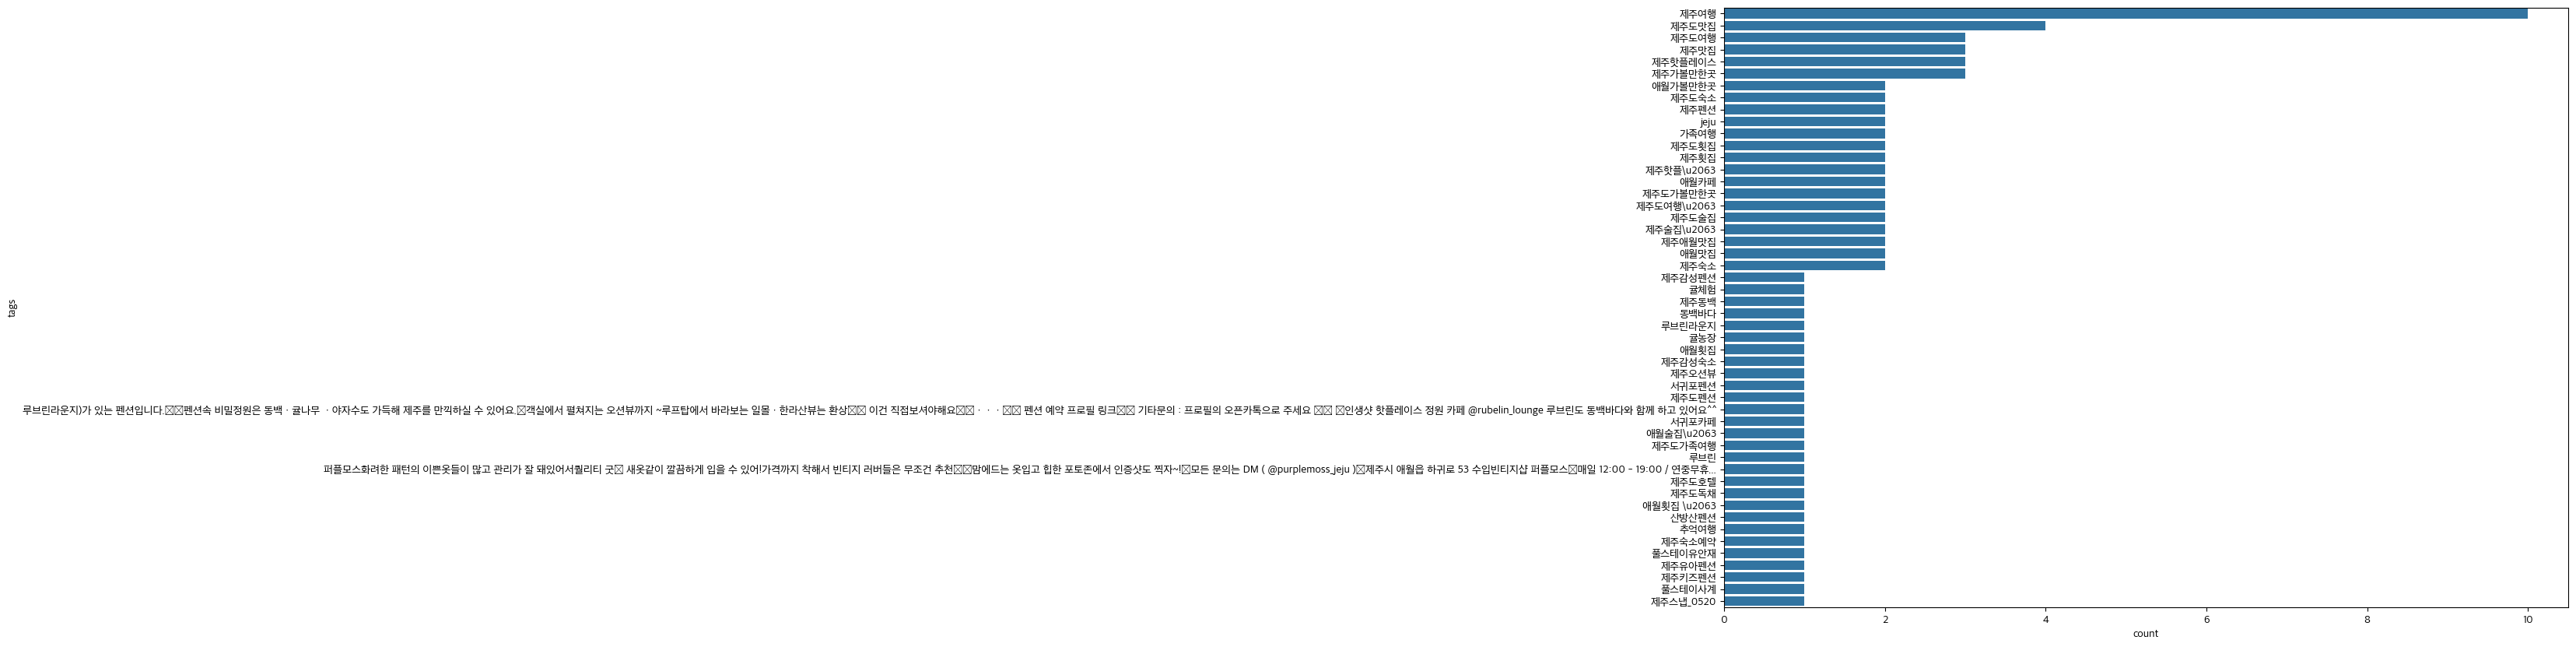

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family']= 'apple SD Gothic Neo'
plt.figure(figsize=(14,10))
sns.barplot(x='count',y='tags',data=tag_top_50)
plt.show()

In [20]:
pip install wordCloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:


tag__= tag_top_50['tags']
count__=tag_top_50['count']
dict_ = dict(zip(tag__,count__))
dict_



{'제주여행': 10,
 '제주도맛집': 4,
 '제주도여행': 3,
 '제주맛집': 3,
 '제주핫플레이스': 3,
 '제주가볼만한곳': 3,
 '애월가볼만한곳': 2,
 '제주도숙소': 2,
 '제주펜션': 2,
 'jeju': 2,
 '가족여행': 2,
 '제주도횟집': 2,
 '제주횟집': 2,
 '제주핫플\\u2063': 2,
 '애월카페': 2,
 '제주도가볼만한곳': 2,
 '제주도여행\\u2063': 2,
 '제주도술집': 2,
 '제주술집\\u2063': 2,
 '제주애월맛집': 2,
 '애월맛집': 2,
 '제주숙소': 2,
 '제주감성펜션': 1,
 '귤체험': 1,
 '제주동백': 1,
 '동백바다': 1,
 '루브린라운지': 1,
 '귤농장': 1,
 '애월횟집': 1,
 '제주감성숙소': 1,
 '제주오션뷰': 1,
 '서귀포펜션': 1,
 '제주도펜션': 1,
 '루브린라운지)가 있는 펜션입니다.🌺🌿펜션속 비밀정원은 동백ㆍ귤나무 ㆍ야자수도 가득해 제주를 만끽하실 수 있어요.🌌객실에서 펼쳐지는 오션뷰까지 ~루프탑에서 바라보는 일몰ㆍ한라산뷰는 환상👍👍 이건 직접보셔야해요🧡😊ㆍㆍㆍ✔️ 펜션 예약 프로필 링크✔️ 기타문의 : 프로필의 오픈카톡으로 주세요 🙏🏻 ☕인생샷 핫플레이스 정원 카페 @rubelin_lounge 루브린도 동백바다와 함께 하고 있어요^^': 1,
 '서귀포카페': 1,
 '애월술집\\u2063': 1,
 '제주도가족여행': 1,
 '루브린': 1,
 '퍼플모스화려한 패턴의 이쁜옷들이 많고 관리가 잘 돼있어서퀄리티 굿👍 새옷같이 깔끔하게 입을 수 있어!가격까지 착해서 빈티지 러버들은 무조건 추천👏👏맘에드는 옷입고 힙한 포토존에서 인증샷도 찍자~!📩모든 문의는 DM ( @purplemoss_jeju )📍제주시 애월읍 하귀로 53 수입빈티지샵 퍼플모스⏰매일 12:00 - 19:00 / 연중무휴...': 1,
 '제주도호텔': 1,
 '제주도독채': 1,
 '애월횟집 \\u2063': 1,
 '산방산펜션': 1,
 '추억여행':

In [22]:
tag_count

Counter({'제주여행': 10,
         '제주도맛집': 4,
         '제주가볼만한곳': 3,
         '제주핫플레이스': 3,
         '제주맛집': 3,
         '제주도여행': 3,
         '제주도가볼만한곳': 2,
         '제주펜션': 2,
         '제주숙소': 2,
         '애월맛집': 2,
         '제주애월맛집': 2,
         '제주술집\\u2063': 2,
         '제주도술집': 2,
         '제주도여행\\u2063': 2,
         '애월카페': 2,
         '애월가볼만한곳': 2,
         '제주핫플\\u2063': 2,
         '제주횟집': 2,
         '제주도횟집': 2,
         '제주도숙소': 2,
         'jeju': 2,
         '가족여행': 2,
         '퍼플모스화려한 패턴의 이쁜옷들이 많고 관리가 잘 돼있어서퀄리티 굿👍 새옷같이 깔끔하게 입을 수 있어!가격까지 착해서 빈티지 러버들은 무조건 추천👏👏맘에드는 옷입고 힙한 포토존에서 인증샷도 찍자~!📩모든 문의는 DM ( @purplemoss_jeju )📍제주시 애월읍 하귀로 53 수입빈티지샵 퍼플모스⏰매일 12:00 - 19:00 / 연중무휴...': 1,
         '정보통_제주': 1,
         '제주도옷가게': 1,
         '제주도빈티지샵': 1,
         '애월핫플': 1,
         '제주카페': 1,
         '성산일출봉카페': 1,
         '제주카페추천': 1,
         '제주루프탑카페': 1,
         '제주여행코스': 1,
         '제주도날씨': 1,
         '제주서귀포카페추천': 1,
         '제주데이트': 1,
         '제주도카페': 1,
         '성산카페': 1,
  

(-0.5, 799.5, 399.5, -0.5)

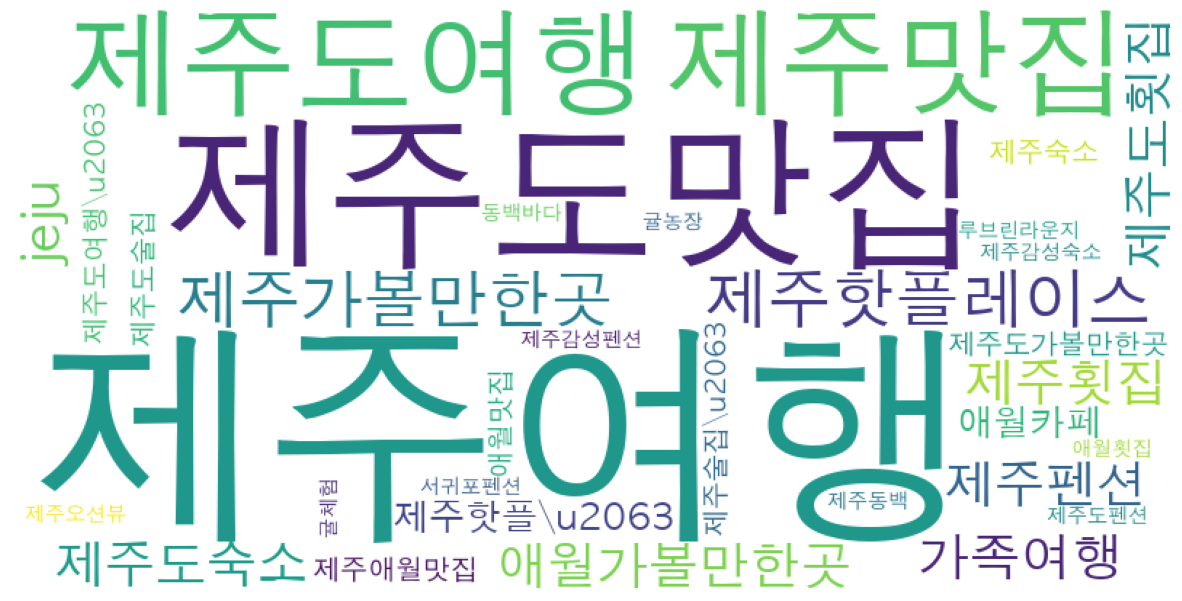

In [23]:
from wordcloud import WordCloud

#윈도우 경로로 넣어주세요
font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

word_ = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(dict_)

plt.figure(figsize=(15,10))
plt.imshow(word_)
plt.axis('off')

In [82]:
tag_top_50.head()

,tags,count
0,제주여행,10
1,제주도맛집,4
2,제주도여행,3
3,제주맛집,3
4,제주핫플레이스,3


In [1]:
pip install Sqlalchemy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install pymysql

  Obtaining dependency information for pymysql from https://files.pythonhosted.org/packages/e5/30/20467e39523d0cfc2b6227902d3687a16364307260c75e6a1cb4422b0c62/PyMySQL-1.1.0-py3-none-any.whl.metadata
  Using cached PyMySQL-1.1.0-py3-none-any.whl.metadata (4.4 kB)
Using cached PyMySQL-1.1.0-py3-none-any.whl (44 kB)

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

/var/folders/wt/2y6lq78x2_z3fsgwvz2bnhm80000gn/T/ipykernel_34063/759018811.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [27]:

from sqlalchemy import create_engine


host = 'localhost'
user = 'root'
password = 'cpdms1289@'
database = 'instatag'


engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

In [28]:
query = 'select * from category'
sql_cate_df = pd.read_sql(query , con=engine ) 

OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on '@localhost' ([Errno 8] nodename nor servname provided, or not known)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
idx = sql_cate_df.loc[sql_cate_df['name'] == '제주도', 'idx']
idx